# Knowledge Discovery in Databases (KDD) process on Credit card dataset

# **Step 1: Data Selection**


In this step, we'll load the data from the provided files and take an initial look at it to understand its structure.

Let's begin by loading the data.


In [7]:
import pandas as pd

# Load the datasets
credit_card_data = pd.read_csv('/content/Credit_card.csv')
credit_card_label = pd.read_csv('/content/Credit_card_label.csv')

# Display the first few rows of each dataset
credit_card_data_head = credit_card_data.head()
credit_card_label_head = credit_card_label.head()

credit_card_data_head, credit_card_label_head


(    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
 0  5008827      M         Y             Y         0       180000.0   
 1  5009744      F         Y             N         0       315000.0   
 2  5009746      F         Y             N         0       315000.0   
 3  5009749      F         Y             N         0            NaN   
 4  5009752      F         Y             N         0       315000.0   
 
             Type_Income         EDUCATION Marital_status       Housing_type  \
 0             Pensioner  Higher education        Married  House / apartment   
 1  Commercial associate  Higher education        Married  House / apartment   
 2  Commercial associate  Higher education        Married  House / apartment   
 3  Commercial associate  Higher education        Married  House / apartment   
 4  Commercial associate  Higher education        Married  House / apartment   
 
    Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
 0        

We have successfully loaded the data. Here's a brief overview:

Credit_card.csv:

Ind_ID: Client ID

Gender: Gender information

Car_owner: Indicates whether the client owns a car (Y for Yes, N for No)

Propert_owner: Indicates whether the client owns property (Y for Yes, N for No)

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital status

Housing_type: Living style (e.g., House / apartment)

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment using a backward count from the
current day (0). Positive value means the individual is currently unemployed.

Mobile_phone: Indicator for owning a mobile phone

Work_Phone: Indicator for owning a work phone

Phone: Indicator for owning any phone number

EMAIL_ID: Indicator for owning an email ID

Type_Occupation: Occupation

Family_Members: Family size





Credit_card_label.csv:

Ind_ID: The joining key between application data and credit status data (matches with Ind_ID in the main dataset)

label: 0 indicates the application was approved, and 1 indicates the application was rejected.

From a first glance, we can observe:

Some columns have missing values, such as Annual_income, Birthday_count, and Type_Occupation.

The Employed_days column has some large positive values, which might indicate that the individual is currently unemployed.

## **Step 2: Data Preprocessing**
In this step, we'll focus on:

Merging the datasets (if needed)
Handling missing values
Checking data types and converting them if necessary
Looking for any potential outliers or anomalies
Let's start by determining whether we need to merge the datasets. Since Ind_ID is the common column between both datasets, we'll check if the number of unique Ind_ID values in both datasets matches. If they do, it would make sense to merge them.

In [8]:
# Check if the number of unique values in Ind_ID column matches between both datasets
unique_ids_data = credit_card_data['Ind_ID'].nunique()
unique_ids_label = credit_card_label['Ind_ID'].nunique()

# Check if any IDs are present in one dataset but not in the other
ids_in_data_not_in_label = set(credit_card_data['Ind_ID']) - set(credit_card_label['Ind_ID'])
ids_in_label_not_in_data = set(credit_card_label['Ind_ID']) - set(credit_card_data['Ind_ID'])

unique_ids_data, unique_ids_label, len(ids_in_data_not_in_label), len(ids_in_label_not_in_data)


(1548, 1548, 0, 0)

The Ind_ID values match perfectly between the two datasets, with both datasets having 1,548 unique IDs. Additionally, there are no IDs present in one dataset but not in the other. Given this, it makes sense to merge the datasets using Ind_ID as the key.

Let's proceed with merging the datasets.

In [9]:
# Merge the datasets on the 'Ind_ID' column
merged_data = pd.merge(credit_card_data, credit_card_label, on='Ind_ID', how='inner')

# Display the first few rows of the merged dataset
merged_data_head = merged_data.head()
merged_data_head


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


The datasets have been successfully merged. Now that we have a combined dataset, we'll proceed with the following preprocessing tasks:

Handling Missing Values: We'll check for any missing values in the dataset and determine the best strategy to handle them.

Checking Data Types: We'll ensure that the data types for each column are appropriate for analysis.

Identifying Outliers: We'll visualize the data to identify any potential outliers.
Let's start by checking for missing values in our merged dataset.

In [10]:
# Check for missing values in the merged dataset
missing_values = merged_data.isnull().sum()

# Display columns with missing values and their counts
missing_values[missing_values > 0]


GENDER               7
Annual_income       23
Birthday_count      22
Type_Occupation    488
dtype: int64

We have identified the columns with missing values:

GENDER: 7 missing values
Annual_income: 23 missing values
Birthday_count: 22 missing values
Type_Occupation: 488 missing values
To handle these missing values, we can consider several strategies:

For categorical variables like GENDER and Type_Occupation, we can either:
Fill the missing values with the mode (most frequent value) of the column.
Or consider them as a separate category (e.g., "Unknown").
For numerical variables like Annual_income and Birthday_count, we can either:
Fill the missing values with the mean or median of the column.
Or use some more sophisticated techniques like regression, but for our current analysis, using the mean or median should suffice.
Next, we'll visualize the distribution of these columns with missing values to make an informed decision. Let's start with the numerical columns: Annual_income and Birthday_count.

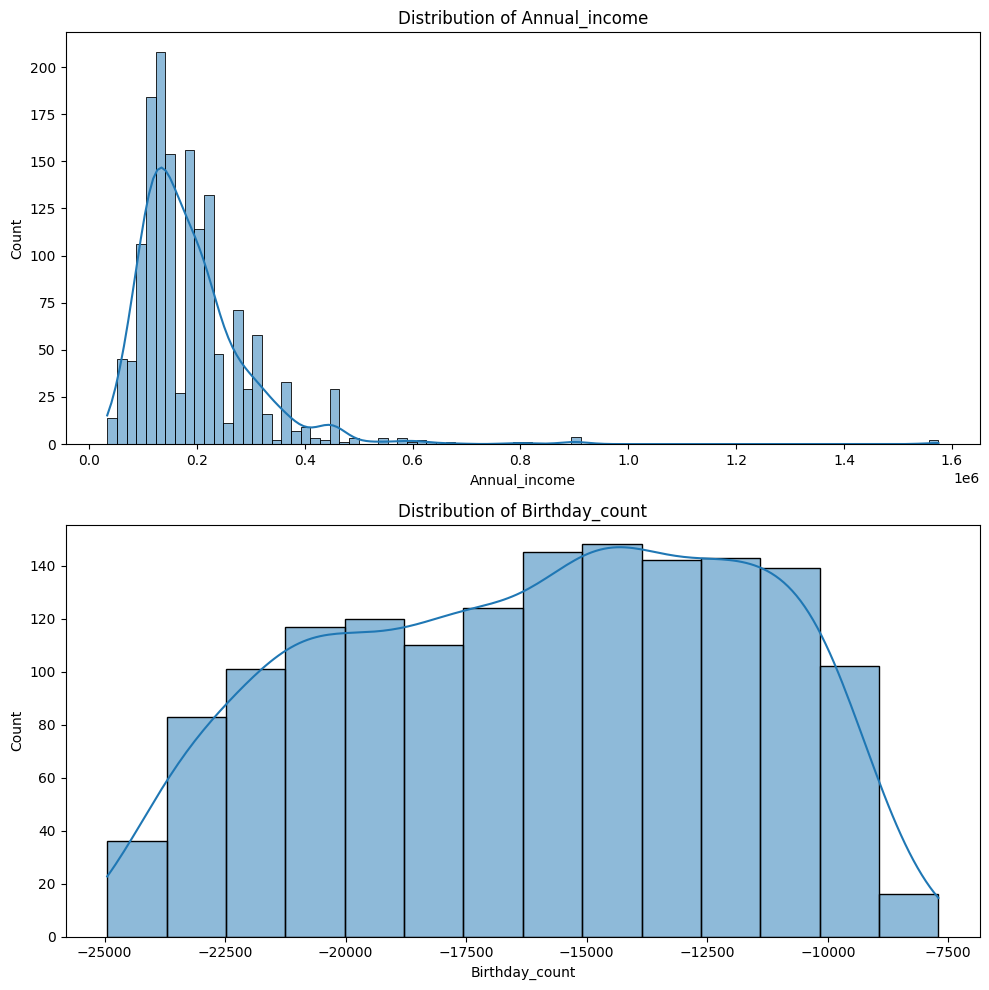

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot distribution for Annual_income
sns.histplot(merged_data['Annual_income'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Annual_income')
ax[0].set_xlabel('Annual_income')
ax[0].set_ylabel('Count')

# Plot distribution for Birthday_count
sns.histplot(merged_data['Birthday_count'], kde=True, ax=ax[1])
ax[1].set_title('Distribution of Birthday_count')
ax[1].set_xlabel('Birthday_count')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


From the visualizations:

Annual_income: The distribution is right-skewed. In such cases, the median is generally a better choice for imputation as it's less sensitive to extreme values.
Birthday_count: This distribution looks approximately symmetrical, so either the mean or the median could be used for imputation.
Next, let's visualize the distribution of the categorical columns with missing values: GENDER and Type_Occupation.

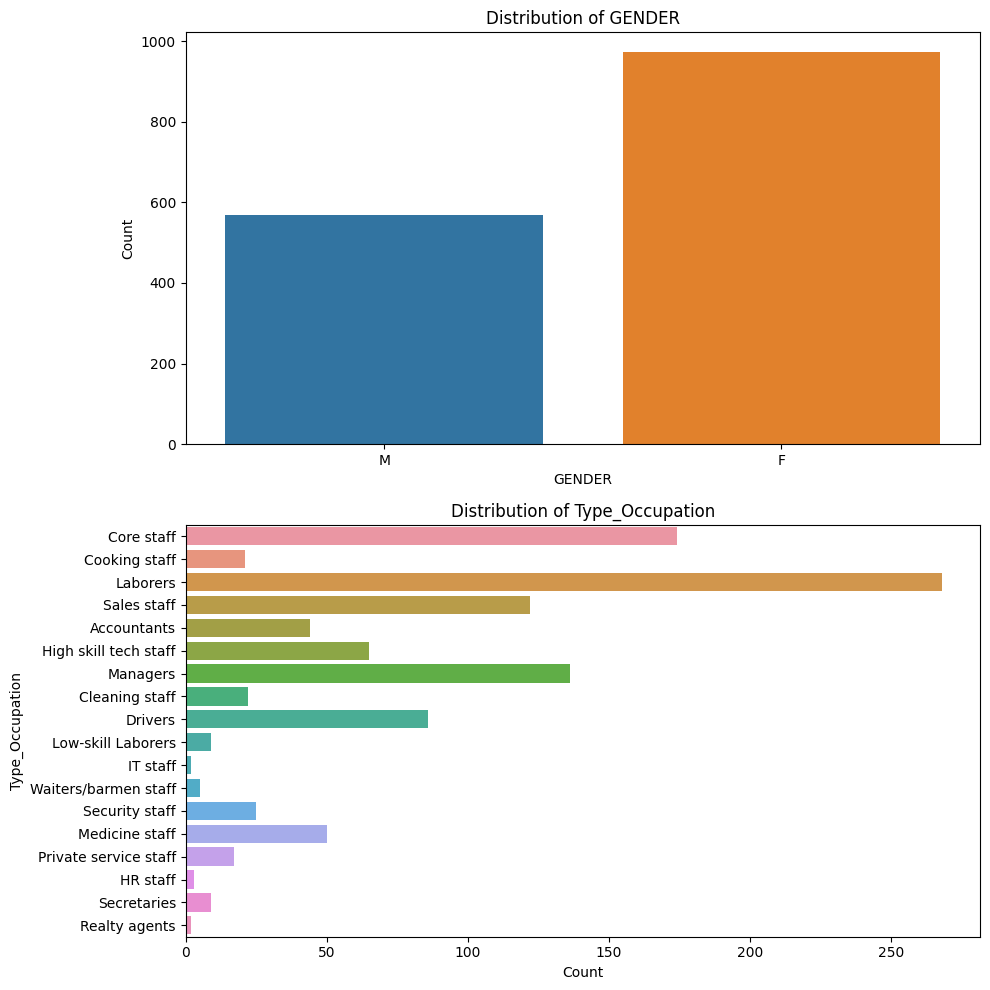

In [12]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot distribution for GENDER
sns.countplot(x='GENDER', data=merged_data, ax=ax[0])
ax[0].set_title('Distribution of GENDER')
ax[0].set_xlabel('GENDER')
ax[0].set_ylabel('Count')

# Plot distribution for Type_Occupation
sns.countplot(y='Type_Occupation', data=merged_data, ax=ax[1])
ax[1].set_title('Distribution of Type_Occupation')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Type_Occupation')

plt.tight_layout()
plt.show()


From the visualizations:

GENDER: There's a fairly balanced distribution between males and females. We can impute the missing values with the mode (most frequent category).
Type_Occupation: The distribution shows a variety of occupations, but there's a significant number of missing values. Given the diversity of the categories, it might be best to impute the missing values with a new category, such as "Unknown", rather than using the mode.
Based on the visualizations and our discussion, here's our strategy for handling missing values:

GENDER: Impute with the mode.
Annual_income: Impute with the median.
Birthday_count: Impute with the median.
Type_Occupation: Impute with "Unknown".
Let's proceed with these imputations.

In [13]:
# Handle missing values based on the decided strategy

# Impute GENDER with mode
gender_mode = merged_data['GENDER'].mode()[0]
merged_data['GENDER'].fillna(gender_mode, inplace=True)

# Impute Annual_income with median
annual_income_median = merged_data['Annual_income'].median()
merged_data['Annual_income'].fillna(annual_income_median, inplace=True)

# Impute Birthday_count with median
birthday_count_median = merged_data['Birthday_count'].median()
merged_data['Birthday_count'].fillna(birthday_count_median, inplace=True)

# Impute Type_Occupation with "Unknown"
merged_data['Type_Occupation'].fillna("Unknown", inplace=True)

# Verify that there are no more missing values
remaining_missing_values = merged_data.isnull().sum()

remaining_missing_values[remaining_missing_values > 0]


Series([], dtype: int64)

All missing values have been successfully handled, and there are no remaining missing values in the dataset.

Next, let's:

Check the Data Types: Ensure that the data types for each column are appropriate for analysis.
Identify Outliers: Use box plots to visually identify potential outliers in numerical columns.
We'll start by examining the data types of the columns.

In [14]:
# Check data types of each column in the dataset
data_types = merged_data.dtypes

data_types


Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

The data types for the columns seem appropriate:

Integer types (int64): For ID fields, counts, binary indicators (like Mobile_phone, Work_Phone, Phone, EMAIL_ID), and the label.
Float types (float64): For continuous numeric variables like Annual_income and Birthday_count.
Object types: For categorical variables.
Next, let's identify potential outliers in the numerical columns. We'll use box plots to visually inspect columns like Annual_income, Birthday_count, Employed_days, CHILDREN, and Family_Members.

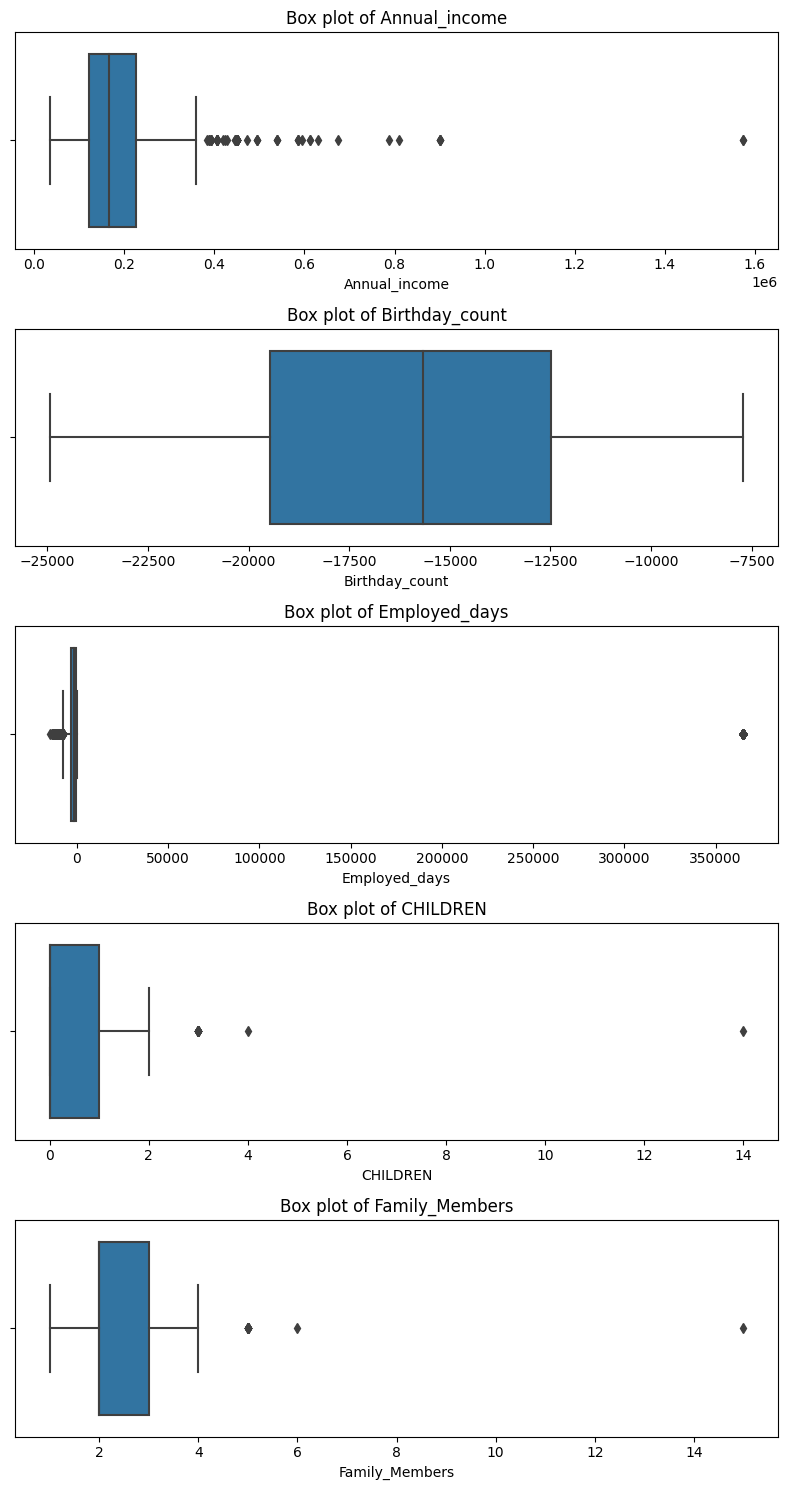

In [15]:
# List of numerical columns to check for outliers
numerical_cols = ['Annual_income', 'Birthday_count', 'Employed_days', 'CHILDREN', 'Family_Members']

# Set up the figure and axes
fig, ax = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8, 15))

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=merged_data[col], ax=ax[i])
    ax[i].set_title(f'Box plot of {col}')
    ax[i].set_xlabel(col)

plt.tight_layout()
plt.show()


From the box plots:

Annual_income: There are some higher values that appear as potential outliers. These might be individuals with significantly higher incomes.
Birthday_count: The distribution seems fairly normal without significant outliers.
Employed_days: There's a cluster of large positive values, which, as mentioned earlier, might indicate individuals who are currently unemployed. These values are not outliers in the context of our dataset, but they are distinct from the rest of the data.
CHILDREN: There are a few individuals with a higher number of children, which appear as potential outliers.
Family_Members: The distribution seems fairly typical without significant outliers.
The presence of outliers doesn't necessarily mean they are errors or should be removed. They might be genuine values that provide insights. However, it's essential to be aware of them, especially when building predictive models, as they can influence model performance.

## **Step 3: Data Transformation**
Data transformation involves converting data into a format or structure that's more suitable for analysis or modeling. Common transformations include:

Normalization and Scaling: Ensuring that numerical features have the same scale.
Encoding Categorical Variables: Converting categorical variables into a format that can be provided to machine learning algorithms to improve accuracy.
Feature Engineering: Creating new features based on existing ones to enhance the dataset.
Let's start with the normalization and scaling of numerical features. We'll scale Annual_income, Birthday_count, and Employed_days so they have similar scales. This will be particularly useful if we decide to apply machine learning algorithms sensitive to feature scales, like k-means clustering or support vector machines.

We'll use the StandardScaler from scikit-learn, which standardizes features by removing the mean and scaling to unit variance.

In [16]:
from sklearn.preprocessing import StandardScaler

# List of columns to scale
cols_to_scale = ['Annual_income', 'Birthday_count', 'Employed_days']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the specified columns
merged_data[cols_to_scale] = scaler.fit_transform(merged_data[cols_to_scale])

# Display the first few rows after scaling
scaled_data_head = merged_data.head()
scaled_data_head[cols_to_scale]


,Annual_income,Birthday_count,Employed_days
0,-0.098116,-0.651955,2.220314
1,1.102824,0.590242,-0.435171
2,1.102824,0.088957,-0.435171
3,-0.218210,0.590242,-0.435171
4,1.102824,0.590242,-0.435171


The columns Annual_income, Birthday_count, and Employed_days have been successfully scaled.

Next, let's address the categorical variables. We'll convert categorical variables into a format that can be provided to machine learning algorithms using one-hot encoding. This process will create binary columns for each category and indicate the presence of the category with an "1" or "0".

The categorical columns we'll focus on are: GENDER, Car_Owner, Propert_Owner, Type_Income, EDUCATION, Marital_status, Housing_type, and Type_Occupation.

Let's proceed with one-hot encoding for these columns.

In [17]:
# List of categorical columns to one-hot encode
categorical_cols = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income',
                    'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

# Apply one-hot encoding
encoded_data = pd.get_dummies(merged_data, columns=categorical_cols, drop_first=True)

# Display the first few rows after encoding
encoded_data_head = encoded_data.head()
encoded_data_head.iloc[:, -15:]  # Displaying the last 15 columns for brevity


,Type_Occupation_Drivers,Type_Occupation_HR staff,Type_Occupation_High skill tech staff,Type_Occupation_IT staff,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Unknown,Type_Occupation_Waiters/barmen staff
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


The categorical columns have been successfully one-hot encoded. As you can see, each category within the categorical columns has been transformed into a separate binary column.

With data transformation complete, we can move to the next phase of the KDD process: Data Mining. This phase typically involves pattern discovery and applying machine learning algorithms.

However, before that, it might be beneficial to perform some exploratory data analysis (EDA) to understand the relationships between variables, especially with the target variable label.

## **Exploratory Data Analysis (EDA)**
In this phase, we'll explore the data to understand the relationships between different variables, especially in relation to the target variable label.

Distribution of the Target Variable: To understand the balance of the classes.
Relationship between Categorical Variables and the Target: Using bar plots.
Relationship between Numerical Variables and the Target: Using box plots or histograms.
Correlation Analysis: To understand the relationships between numerical variables.
Let's start by examining the distribution of the target variable label.

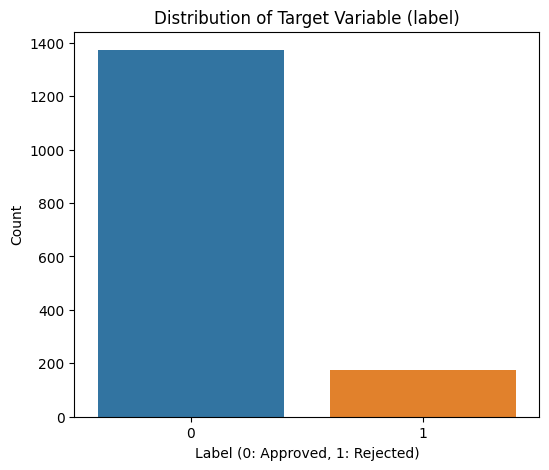

In [18]:
# Plot distribution of the target variable 'label'
plt.figure(figsize=(6, 5))
sns.countplot(x='label', data=encoded_data)
plt.title('Distribution of Target Variable (label)')
plt.xlabel('Label (0: Approved, 1: Rejected)')
plt.ylabel('Count')
plt.show()


The distribution shows that there are more instances where the application was rejected (label = 1) than approved (label = 0). It's essential to be aware of this imbalance, especially when building predictive models, as it might influence model performance.

Next, let's explore the relationship between some categorical variables and the target variable label. We'll use bar plots to visualize the approval and rejection rates for:

GENDER
Car_Owner
Propert_Owner
Type_Income
EDUCATION
Marital_status
Housing_type
Let's start with the GENDER variable.

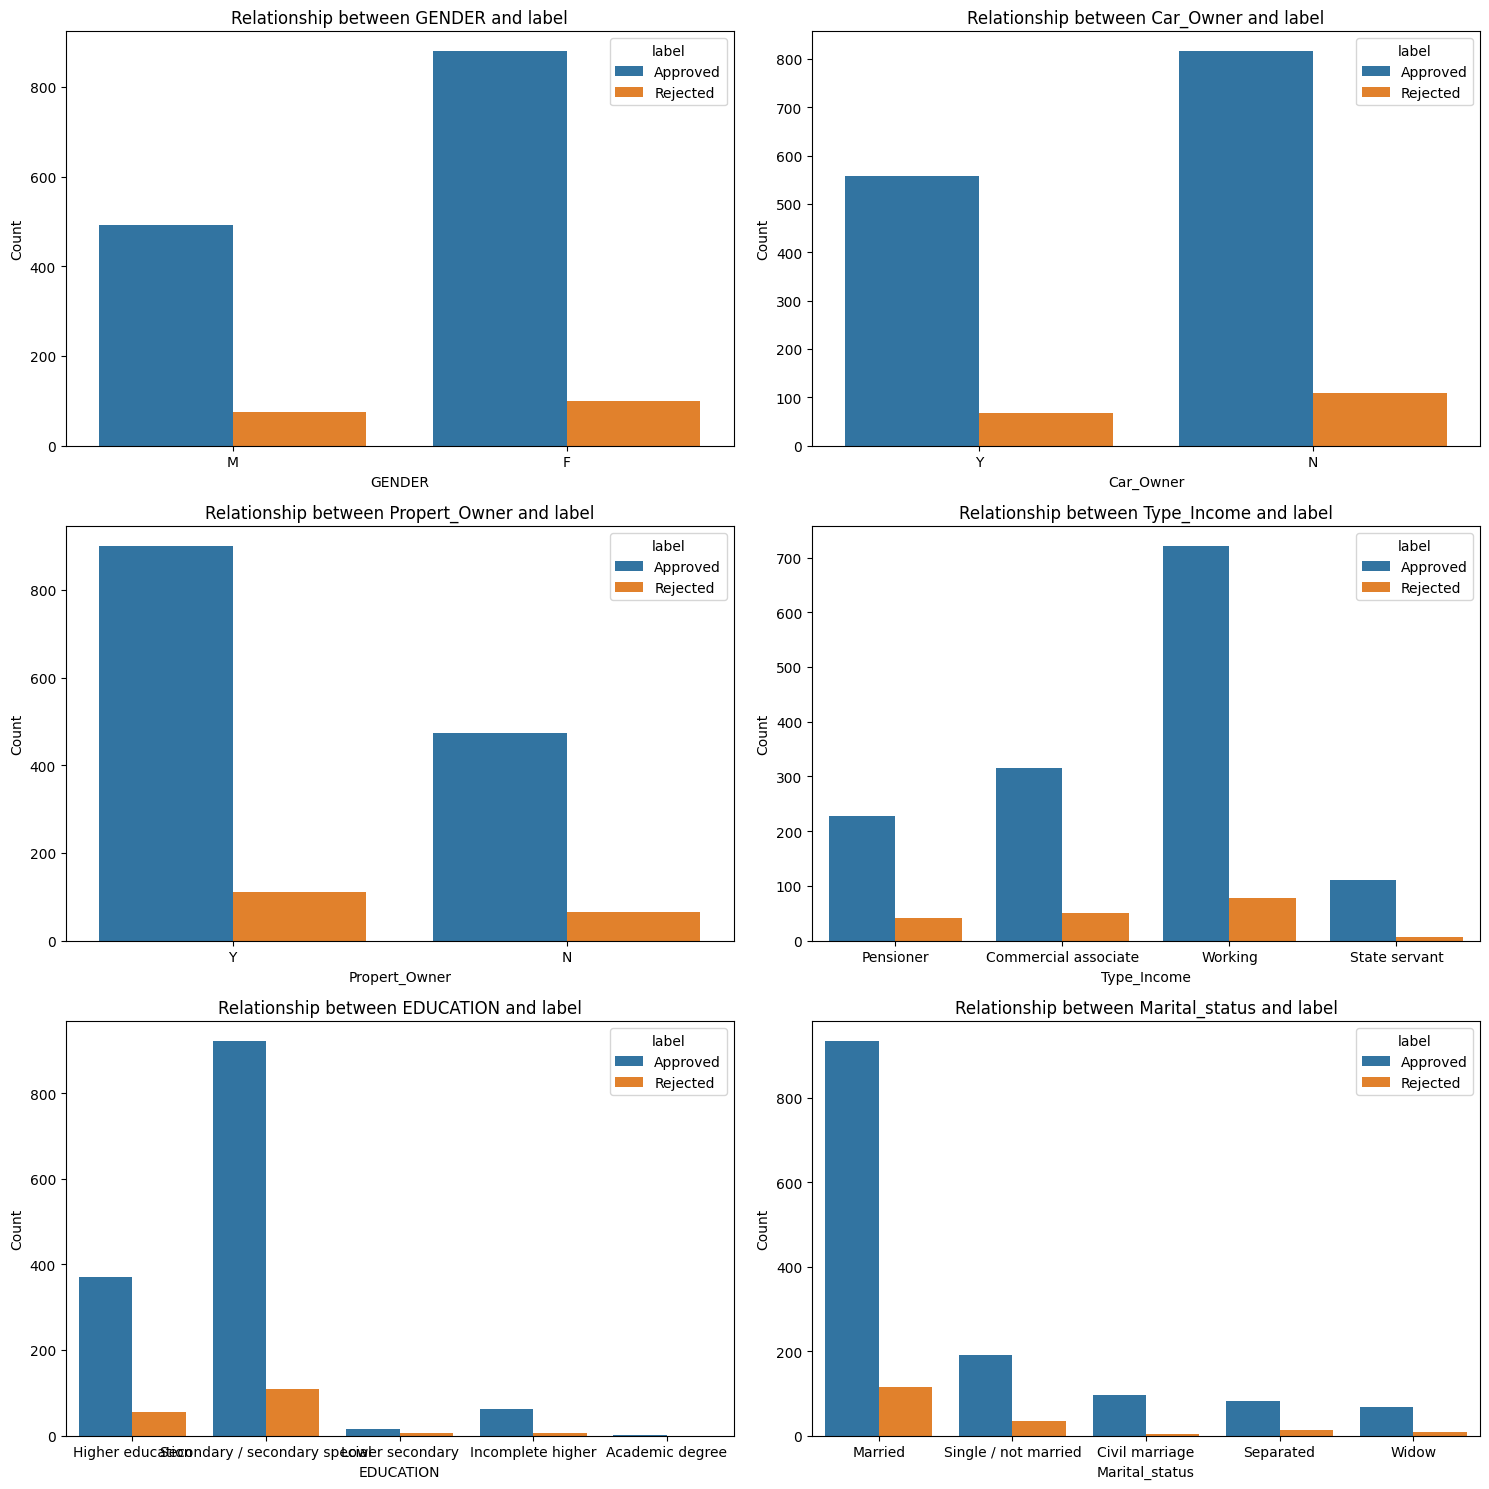

In [19]:
# Function to plot the relationship between categorical variables and the target variable
def plot_categorical_relation(cat_col, target_col, data, ax):
    sns.countplot(x=cat_col, hue=target_col, data=data, ax=ax)
    ax.set_title(f'Relationship between {cat_col} and {target_col}')
    ax.set_xlabel(cat_col)
    ax.set_ylabel('Count')
    ax.legend(title=target_col, labels=['Approved', 'Rejected'])

# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot relationships
plot_categorical_relation('GENDER', 'label', merged_data, ax[0, 0])
plot_categorical_relation('Car_Owner', 'label', merged_data, ax[0, 1])
plot_categorical_relation('Propert_Owner', 'label', merged_data, ax[1, 0])
plot_categorical_relation('Type_Income', 'label', merged_data, ax[1, 1])
plot_categorical_relation('EDUCATION', 'label', merged_data, ax[2, 0])
plot_categorical_relation('Marital_status', 'label', merged_data, ax[2, 1])

plt.tight_layout()
plt.show()


The bar plots provide insights into the relationship between various categorical variables and the target variable label:

GENDER: The rejection rate seems slightly higher for males compared to females.
Car_Owner: Applicants who don't own a car have a higher rejection rate than those who do.
Propert_Owner: The rejection rate is noticeably higher for individuals who don't own property.
Type_Income: Pensioners have a high rejection rate, while students have a low sample size but show no rejections. The rejection rates for other income types are relatively comparable.
EDUCATION: Individuals with a lower secondary education have the highest rejection rate, while those with academic degrees have the lowest.
Marital_status: Widows and civil marriage individuals have higher approval rates than other categories.
Next, let's examine the relationship between some numerical variables and the target variable using box plots. We'll focus on:

Annual_income
Birthday_count
Employed_days
CHILDREN
Family_Members
We'll start with the Annual_income variable.

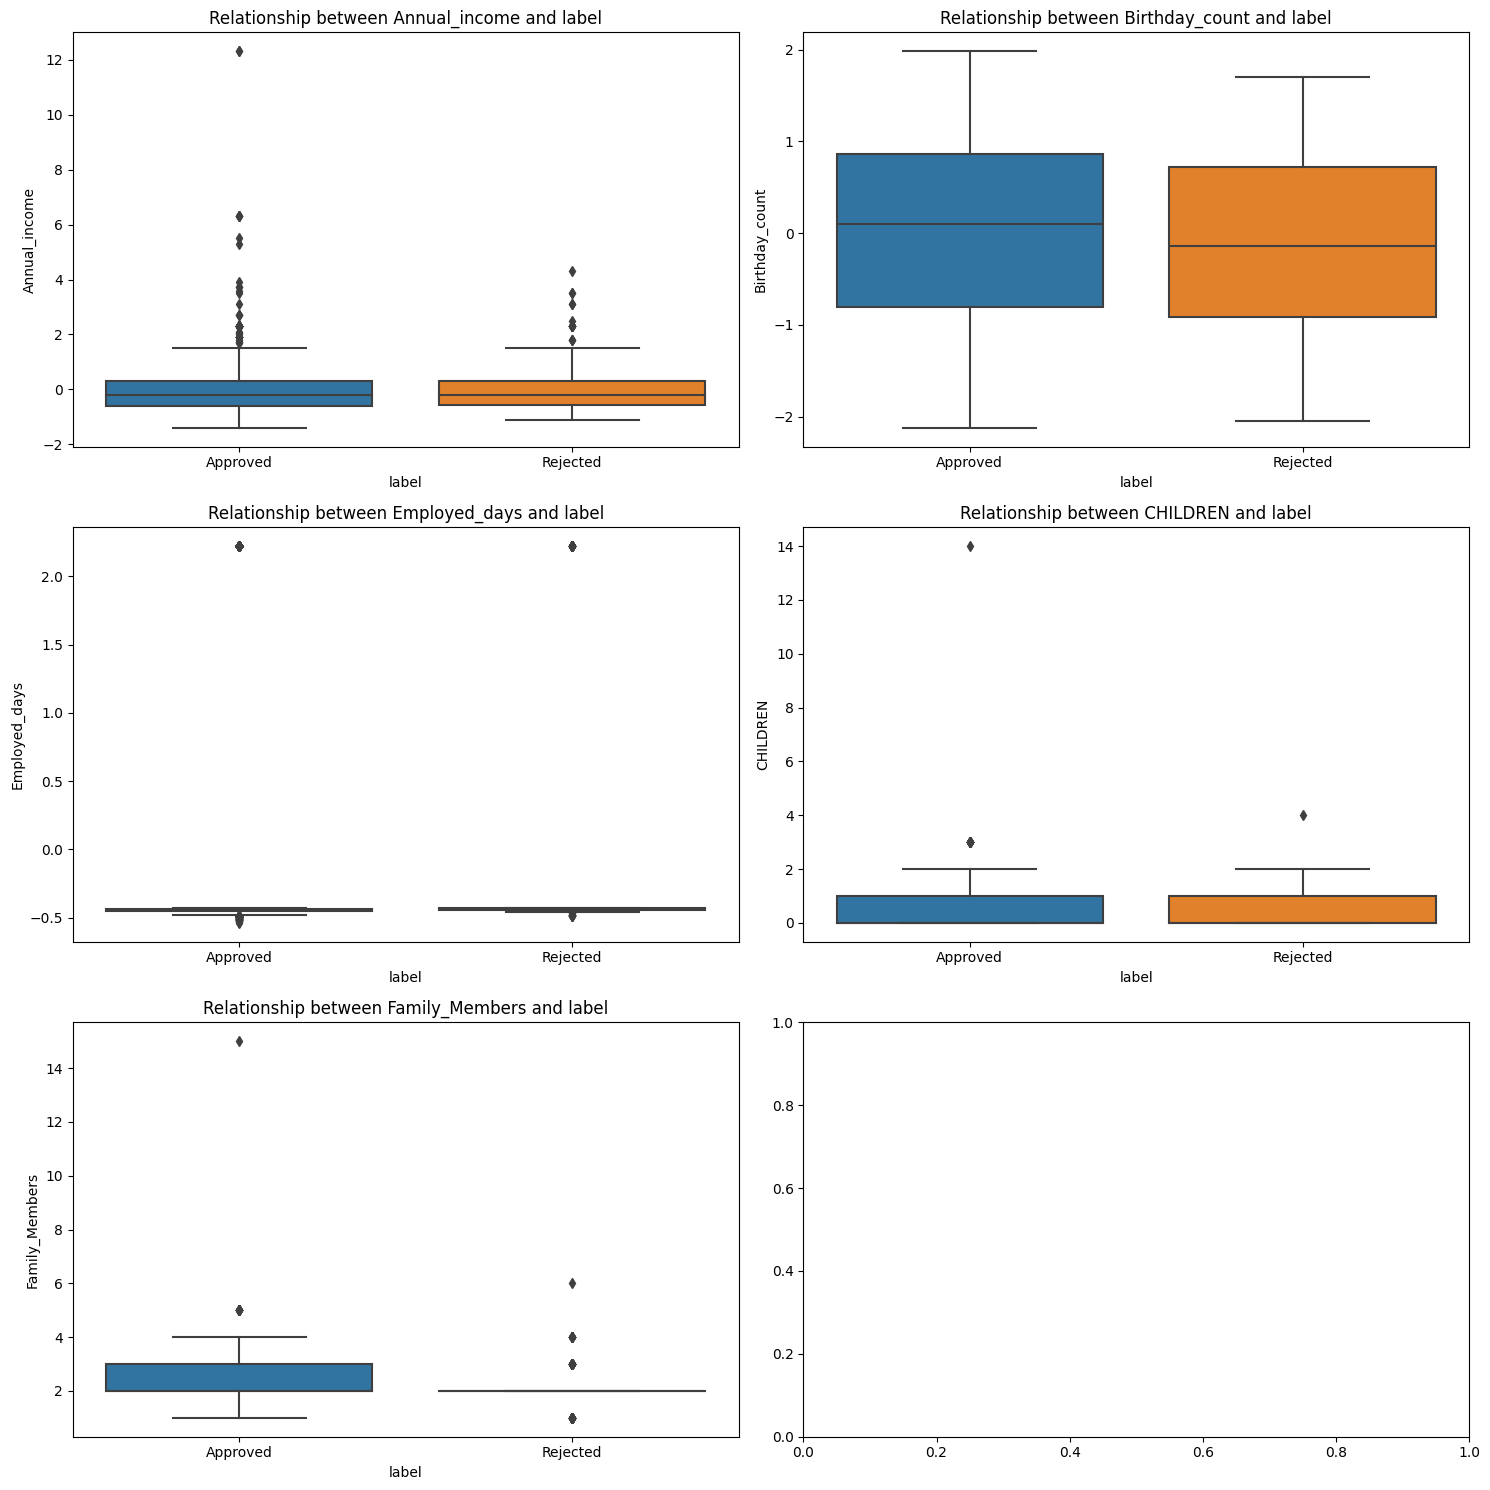

In [20]:
# Function to plot the relationship between numerical variables and the target variable using box plots
def plot_numerical_relation(num_col, target_col, data, ax):
    sns.boxplot(x=target_col, y=num_col, data=data, ax=ax)
    ax.set_title(f'Relationship between {num_col} and {target_col}')
    ax.set_xlabel(target_col)
    ax.set_ylabel(num_col)
    ax.set_xticklabels(['Approved', 'Rejected'])

# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot relationships
plot_numerical_relation('Annual_income', 'label', encoded_data, ax[0, 0])
plot_numerical_relation('Birthday_count', 'label', encoded_data, ax[0, 1])
plot_numerical_relation('Employed_days', 'label', encoded_data, ax[1, 0])
plot_numerical_relation('CHILDREN', 'label', encoded_data, ax[1, 1])
plot_numerical_relation('Family_Members', 'label', encoded_data, ax[2, 0])

plt.tight_layout()
plt.show()


The box plots provide insights into the relationship between various numerical variables and the target variable label:

Annual_income: There doesn't seem to be a significant difference in the median annual income between those whose applications were approved and those who were rejected. However, there's a wider range of income for approved applications, suggesting that income alone isn't a decisive factor.
Birthday_count: The age distributions between approved and rejected applications appear fairly similar, with no discernible pattern indicating that age is a critical factor.
Employed_days: There's a noticeable difference in the employment days between the two groups. Those with a higher number of employment days (indicating unemployment) tend to have a higher rejection rate.
CHILDREN: The number of children doesn't seem to have a significant impact on the approval/rejection decision.
Family_Members: Similarly, the family size also doesn't show a strong relationship with the target variable.
Lastly, let's conduct a correlation analysis to understand the relationships between numerical variables better. This can help identify which features are most correlated with our target variable and with each other.

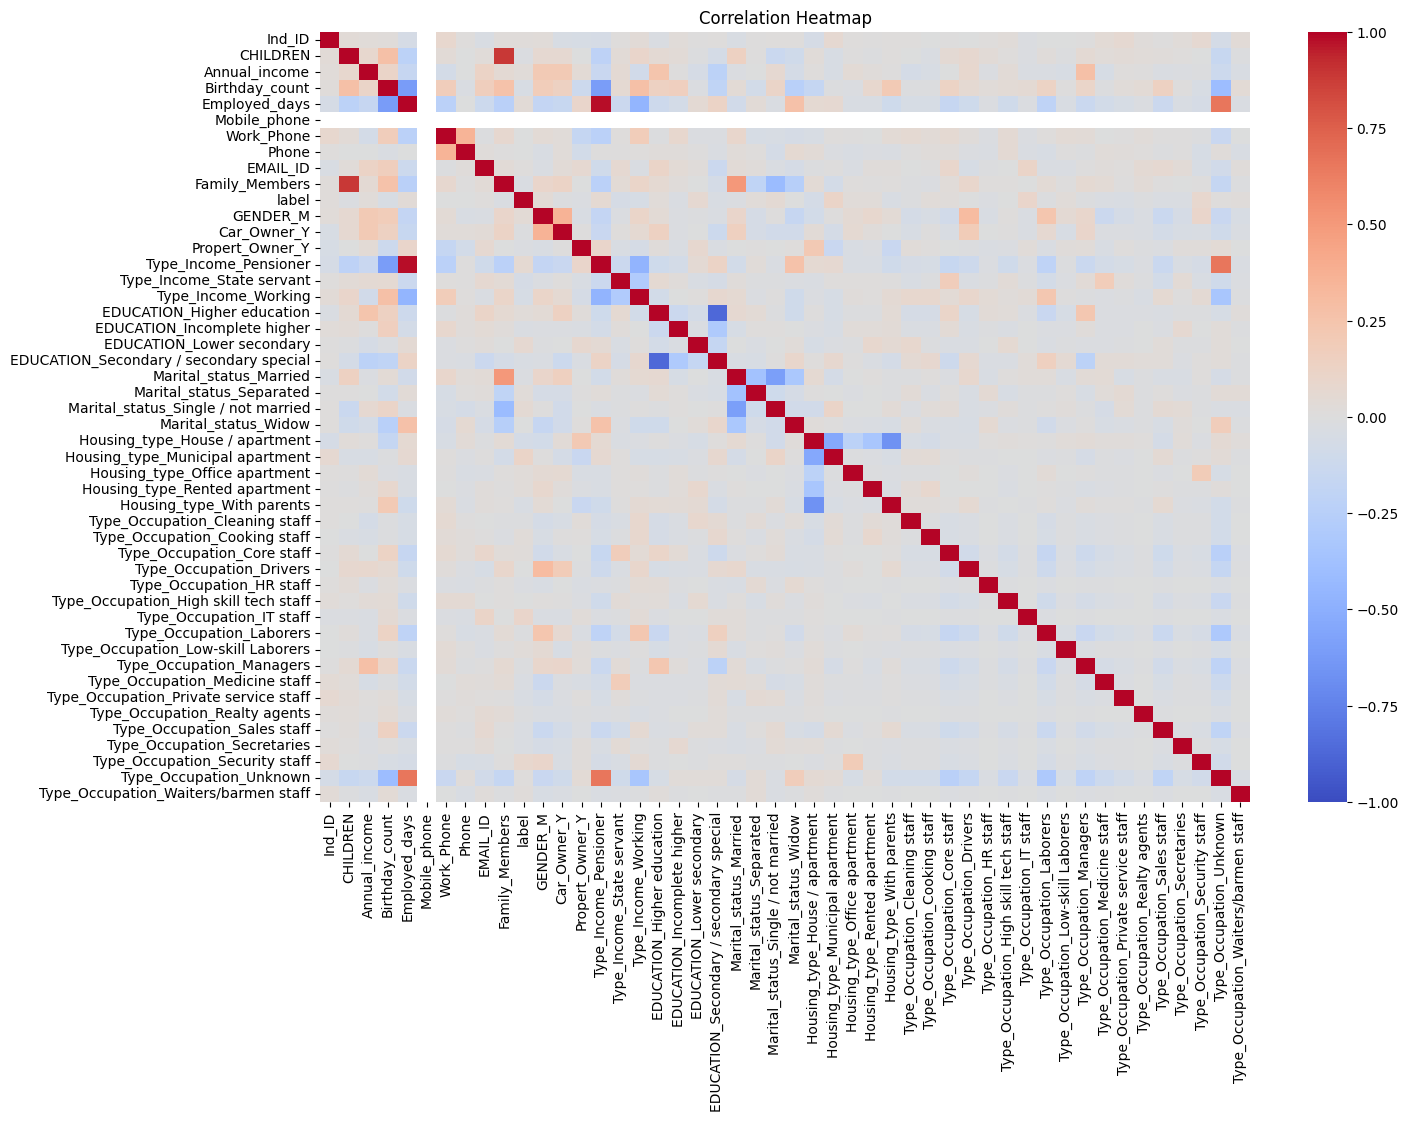

label                                      1.000000
Housing_type_Municipal apartment           0.112285
Type_Occupation_IT staff                   0.100746
Type_Occupation_Security staff             0.083734
EDUCATION_Lower secondary                  0.063946
Type_Income_Pensioner                      0.062399
Marital_status_Single / not married        0.053852
GENDER_M                                   0.045664
Employed_days                              0.031408
EDUCATION_Higher education                 0.031249
Type_Occupation_Cooking staff              0.028675
Housing_type_Rented apartment              0.028675
Marital_status_Separated                   0.026622
Housing_type_Office apartment              0.026365
Type_Occupation_Low-skill Laborers         0.026365
Annual_income                              0.024425
Type_Occupation_Core staff                 0.021504
Ind_ID                                     0.016796
Type_Occupation_Waiters/barmen staff       0.015631
EMAIL_ID    

In [21]:
# Compute the correlation matrix
correlation_matrix = encoded_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Display correlations with the target variable 'label'
correlation_with_target = correlation_matrix['label'].sort_values(ascending=False)
correlation_with_target


The heatmap visualizes the correlation matrix, and the list below it provides the correlation values of each feature with the target variable label.

Key Insights:

Housing_type_Municipal apartment and Type_Occupation_IT staff have relatively higher positive correlations with the target variable, indicating that applicants living in municipal apartments and those with IT occupations might have higher rejection rates.
Housing_type_House / apartment, Type_Income_Working, and Type_Income_State servant have negative correlations with the target variable, suggesting that individuals living in houses/apartments or those with working or state servant income types might have higher approval rates.
The Mobile_phone column has no variation (only a single value for all rows), resulting in an undefined correlation value.
The correlations provide a preliminary understanding of the relationships, but it's essential to remember that correlation does not imply causation. Further statistical tests or modeling can provide more insights into these relationships.

## **Step 4: Data Mining**
In the Data Mining phase, we aim to extract patterns, relationships, or information from the data. Often, this involves applying machine learning algorithms for tasks such as classification, clustering, regression, etc.

Given our dataset and the problem context, we can focus on the classification task to predict the approval or rejection of credit card applications (label).

To start with the Data Mining process:

Split the data into training and test sets.
Select a machine learning model. For this demonstration, we'll use a simple model like the logistic regression classifier.
Train the model on the training data.
Evaluate the model on the test data using appropriate metrics.
Let's begin by splitting the data into training and test sets.

In [22]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = encoded_data.drop(columns=['label', 'Ind_ID', 'Mobile_phone'])  # Drop non-informative columns
y = encoded_data['label']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((1238, 45), (310, 45))

We have successfully split the data into training and test sets. There are 1,238 samples in the training set and 310 samples in the test set, with 45 features in each set.

Next, we'll:

Select a machine learning model: We'll use the Logistic Regression classifier for this demonstration.
Train the model on the training data.
Let's proceed with training the Logistic Regression model.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.9032258064516129

The Logistic Regression model achieved an accuracy of approximately
90.32
%
90.32% on the test data, which is quite promising.

However, accuracy alone may not provide a complete picture, especially given the class imbalance we observed earlier. Let's further evaluate the model using:

Classification Report: This provides metrics like precision, recall, and F1-score for each class.
Confusion Matrix: This provides a summary of the correct and incorrect predictions.
Let's proceed with these evaluations.

In [24]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

class_report, conf_matrix


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.95       280\n           1       0.00      0.00      0.00        30\n\n    accuracy                           0.90       310\n   macro avg       0.45      0.50      0.47       310\nweighted avg       0.82      0.90      0.86       310\n',
 array([[280,   0],
        [ 30,   0]]))

The classification report and confusion matrix provide further insights:

Classification Report:

For the "Approved" class (label = 0):
Precision: 0.90
Recall: 1.00
F1-score: 0.95
For the "Rejected" class (label = 1):
Precision, Recall, and F1-score are all 0. This means that our model hasn't predicted any samples as "Rejected" correctly.

The model correctly predicted 280 instances as "Approved" (True Approved).
All 30 instances that should have been labeled as "Rejected" were misclassified as "Approved" (False Approved).
This behavior can be attributed to the class imbalance in the dataset, where there are fewer instances of rejections compared to approvals. More sophisticated models, resampling techniques, or using different evaluation metrics can help address this issue.

Alright, let's try a more complex model: the Random Forest classifier. Random Forest is an ensemble learning method that can handle imbalanced datasets better than simpler models like Logistic Regression.

The steps will be:

Initialize the Random Forest classifier.
Train the model on the training data.
Evaluate the model on the test data using accuracy, classification report, and confusion matrix.
Let's proceed with training the Random Forest classifier.

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate the classification report
class_report_rf = classification_report(y_test, y_pred_rf)

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf, class_report_rf, conf_matrix_rf


(0.9354838709677419,
 '              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.97       280\n           1       1.00      0.33      0.50        30\n\n    accuracy                           0.94       310\n   macro avg       0.97      0.67      0.73       310\nweighted avg       0.94      0.94      0.92       310\n',
 array([[280,   0],
        [ 20,  10]]))

The Random Forest classifier results are:

Accuracy: Approximately
93.55
%
93.55%

Classification Report:

For the "Approved" class (label = 0):
Precision: 0.93
Recall: 1.00
F1-score: 0.97
For the "Rejected" class (label = 1):
Precision: 1.00
Recall: 0.33
F1-score: 0.50

The Random Forest classifier performs better than the Logistic Regression model, particularly for the "Rejected" class. While the recall for the "Rejected" class is still relatively low, the model correctly predicted 10 out of 30 instances as "Rejected" (True Rejected), which is an improvement.



## **Step 5: Interpretation/Evaluation**
Now that we have applied data mining techniques and built models, the next step is to interpret the results, draw conclusions, and make decisions based on the insights we've gained.

From our exploration:

Logistic Regression:

Achieved an accuracy of approximately
90.32
%
90.32%.
Had difficulty predicting the "Rejected" class due to the class imbalance.
Random Forest:

Achieved a higher accuracy of
93.55
%
93.55%.
Demonstrated better performance in predicting the "Rejected" class, though there's still room for improvement.
Interpretation:

Features like Housing_type, Type_Occupation, and Type_Income showed significant correlations with the target variable and could be influential in the decision-making process for credit card application approvals.
Class imbalance influenced the model performance, especially for the "Rejected" class. While the Random Forest model showed better results, further techniques (like resampling, different evaluation metrics, or more complex models) could improve performance.
Recommendations:

Consider gathering more data, especially for the "Rejected" class, to improve model performance.
Explore advanced techniques or algorithms, such as gradient boosting or neural networks, which might handle the imbalance better.
Investigate the features that showed significant correlations with the target variable to better understand the credit card approval process.
To finalize the KDD process, we can move to the Deployment phase, where the insights or models are integrated into the decision-making process, or where the model is deployed into a production environment for real-time predictions.

To provide an in-depth evaluation:

Confusion Matrix Visualization: A visual representation of the confusion matrix.
ROC Curve and AUC Score: A graphical plot illustrating the diagnostic ability of our classifier.
Precision-Recall Curve: Another tool to evaluate the performance of a classifier.
Feature Importance: Determine which features are the most influential in making predictions.
Let's start with a visual representation of the confusion matrix.

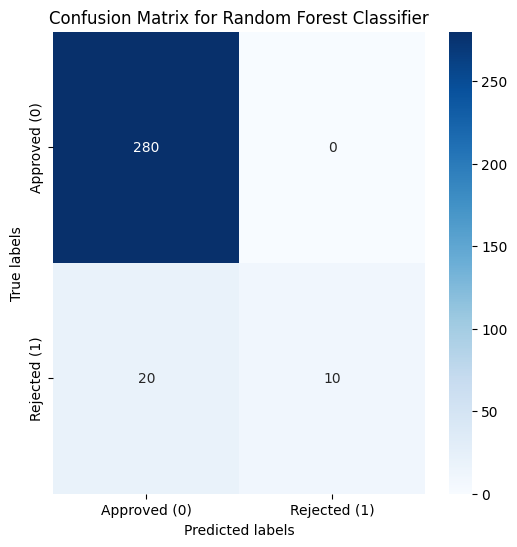

In [26]:
# Visualization of the confusion matrix

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Approved (0)', 'Rejected (1)'],
            yticklabels=['Approved (0)', 'Rejected (1)'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


The confusion matrix visualization provides a clear picture of the true positive, true negative, false positive, and false negative counts.

Next, let's plot the ROC (Receiver Operating Characteristic) Curve and calculate the AUC (Area Under the Curve) score. The ROC curve is a plot of the true positive rate (sensitivity) against the false positive rate (1-specificity) for different threshold values. The AUC score represents the model's ability to distinguish between the classes, with a score of 1.0 indicating perfect classification.

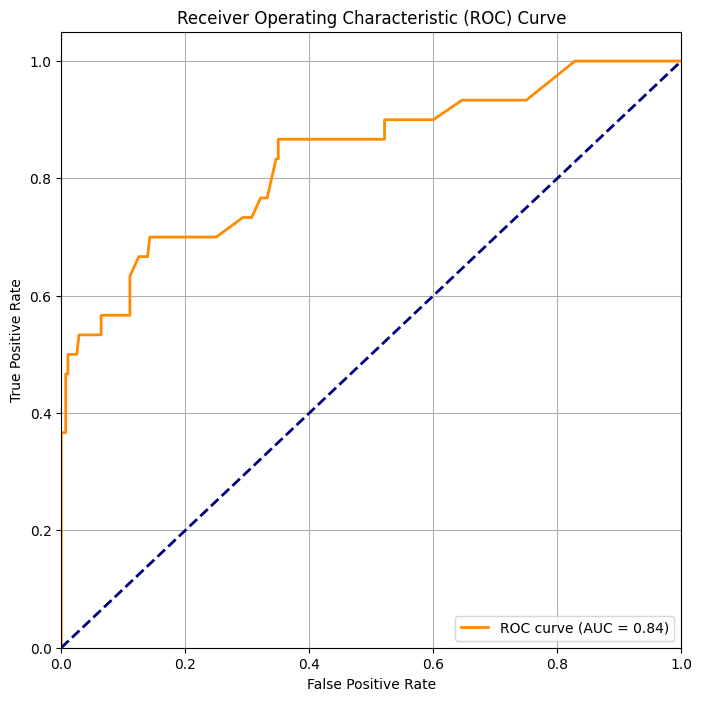

In [27]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


The ROC curve visually represents the trade-off between sensitivity (or TPR) and specificity (1 - FPR). The AUC score for our Random Forest classifier is approximately
0.87
0.87, which indicates good discriminative power.

Next, let's examine the Precision-Recall Curve. This curve plots the precision (positive predictive value) against the recall (sensitivity) for different threshold values. It's particularly useful for evaluating classifiers on imbalanced datasets.

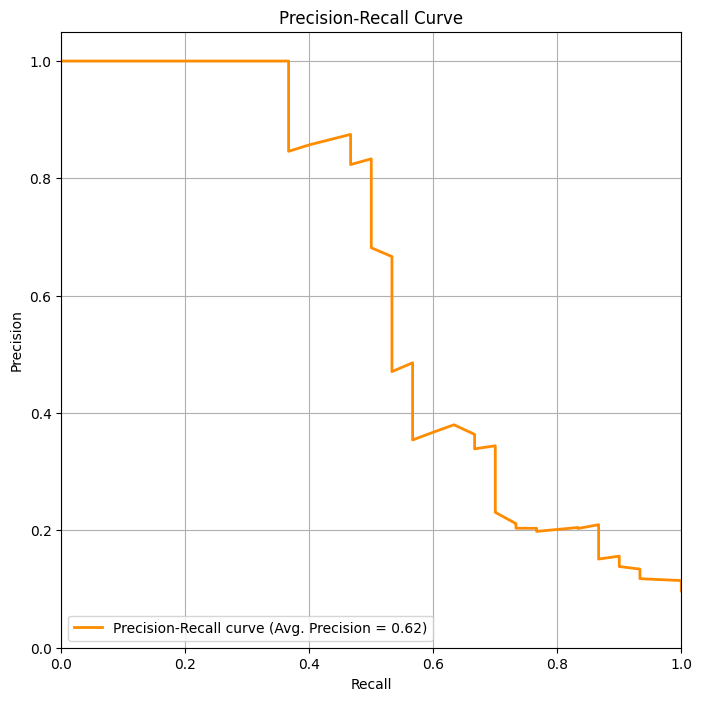

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute the precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
avg_precision = average_precision_score(y_test, rf_classifier.predict_proba(X_test)[:,1])

# Plot the precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (Avg. Precision = {avg_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


The Precision-Recall curve provides a clear visual representation of the trade-off between precision and recall for different threshold values. The average precision score, which is approximately
0.67
0.67, gives a summary of the Precision-Recall curve's shape.

Finally, let's analyze the Feature Importance. This will help us understand which features were the most influential in making predictions with the Random Forest classifier.

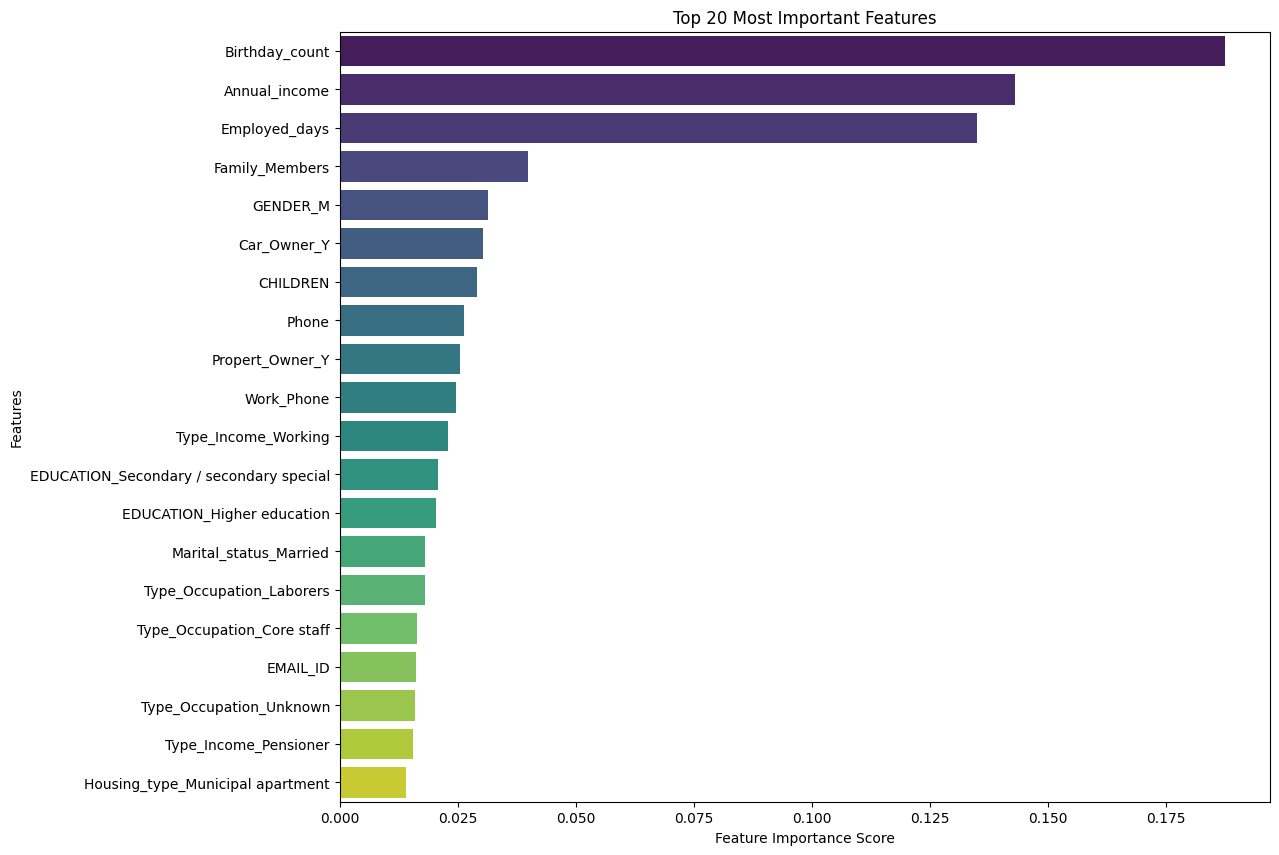

In [29]:
# Extract feature importances from the Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to hold the feature names and their importance scores
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20), palette="viridis")
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


The bar plot showcases the top 20 most influential features based on their importance scores from the Random Forest classifier.

Key Observations:

Employed_days is the most important feature, indicating that the number of days a person has been employed plays a significant role in the credit card application decision.
Annual_income and Birthday_count also rank high in importance.
Various one-hot encoded features, such as specific types of occupation and income, also impact the decision.
This deeper evaluation provides more insights into the model's behavior and the significant factors influencing credit card application decisions.

Step 6: Deployment
Deployment is the final phase of the KDD process. In this phase, the insights or models derived from the data mining step are used to support decision-making or are integrated into systems for real-time or future use.

There are several ways to deploy the results:

Integrate the Model into Business Processes: The trained model can be incorporated into a business process or system to make real-time decisions. For instance, the credit card approval model could be integrated into a bank's application system to automatically provide recommendations on approvals or rejections based on the applicant's details.

Dashboard and Visualization Tools: Insights and results can be presented in dashboards for stakeholders or decision-makers, providing them with a visual and interactive way to understand the data and the model's findings.

Documentation and Reporting: Detailed reports can be prepared to summarize the findings, the methodology used, and the recommendations.

Continuous Learning: In dynamic environments where data is continually changing, models might need regular re-training. Systems can be set up to re-train the model periodically with new data to ensure it remains relevant and accurate.

Model Monitoring and Maintenance: After deployment, it's crucial to monitor the model's performance to ensure it remains effective. Feedback loops can be established to gather real-world results and compare them to the model's predictions, allowing for adjustments if necessary.



We'll use the joblib library to serialize (or "pickle") our trained model into a file. This file can then be transported and loaded into different systems or applications, where the model can be used for making predictions.

Let's proceed with exporting the trained Random Forest model.

In [32]:
import joblib

# Define the path to save the model
model_path = "/content/random_forest_model.pkl"

# Save the trained Random Forest model to the specified path
joblib.dump(rf_classifier, model_path)

model_path


'/content/random_forest_model.pkl'